In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, AdamW


In [64]:
#read data
df=pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understanding the data

In [65]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
df.shape

(7043, 21)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Cleaning

In [ ]:
#transforming all  numeric columns data to detect missing valuse 
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')# error :... to handle non numeric values with NaN
df["MonthlyCharges"]=pd.to_numeric(df["MonthlyCharges"], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [70]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [71]:
#dropping the 11 rows that has null values
print(f"Shape before dropping: {df.shape}")

df=df.dropna()

print(f"Shape after dropping: {df.shape}")


Shape before dropping: (7043, 21)
Shape after dropping: (7032, 21)


In [72]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
df["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

In [74]:
df.drop(columns=["customerID"], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Visualizations

In [75]:
#sns.set_style("ticks")
#sns.set_theme()  # Resets theme to default
my_palette=["#1b7294","#ffcb4b","#dc4247","#48b333","#3ea2ff"]

<Figure size 640x480 with 0 Axes>

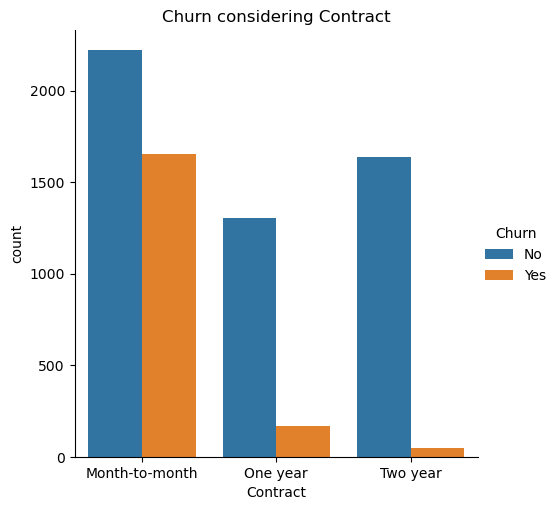

In [76]:
plt.figure()
sns.catplot(x="Contract",data=df,kind="count",hue="Churn")
plt.title("Churn considering Contract")
plt.show()

* Customers with month-to-month contract are most likely to churn

<Figure size 640x480 with 0 Axes>

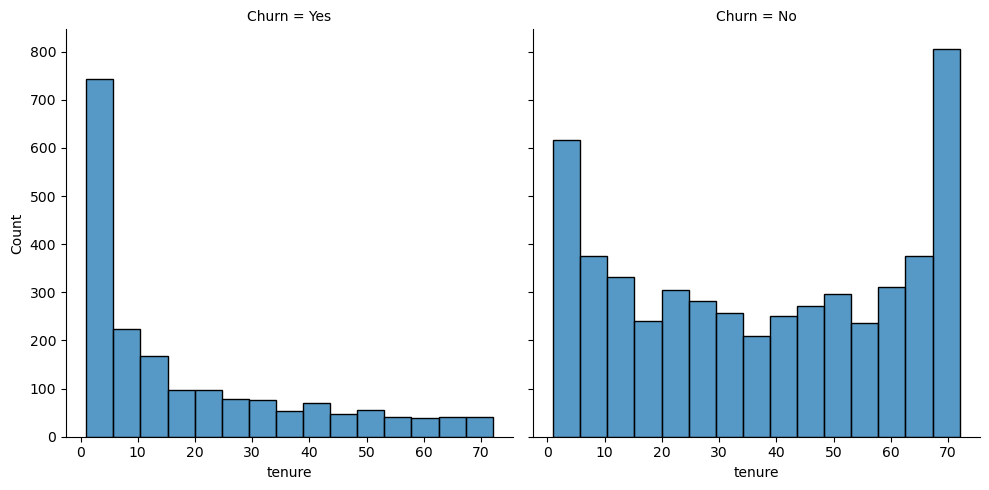

In [77]:
plt.figure()
sns.displot(x="tenure",data=df,col="Churn",kind="hist",bins=15,col_order=["Yes","No"])
plt.show()

* high ratio of customers left early at 0:10 months tenure, which may be caused by several other factors

<Figure size 640x480 with 0 Axes>

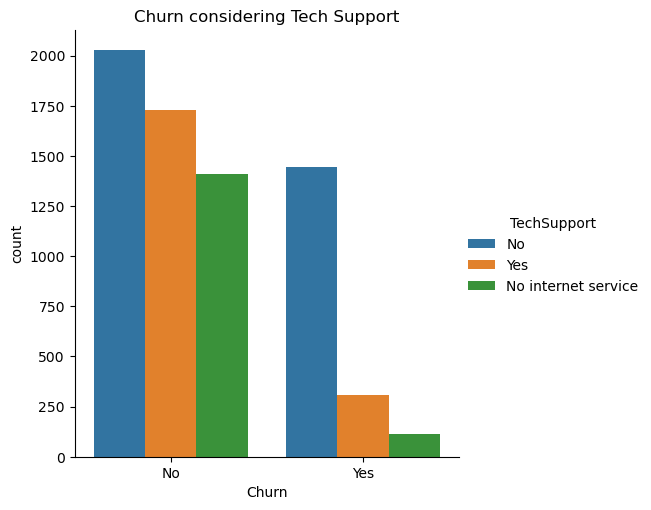

In [78]:
plt.figure()
sns.catplot(x="Churn",kind="count",hue="TechSupport",data=df)
plt.title("Churn considering Tech Support")
plt.show()

* Customers with no tech support are most likely to churn

<Figure size 640x480 with 0 Axes>

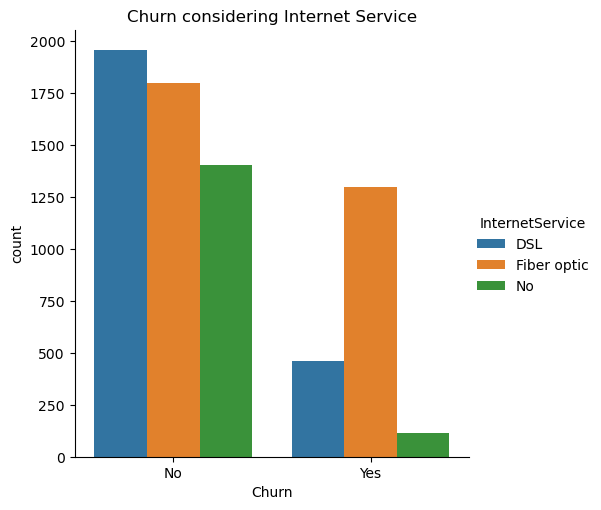

In [79]:
plt.figure()
sns.catplot(x="Churn",kind="count",hue="InternetService",data=df)
plt.title("Churn considering Internet Service")
plt.show()

* it is obvious  that customers with Fiber optic service have higher chance of churn

In [80]:
df["TechSupport"].describe()

count     7032
unique       3
top         No
freq      3472
Name: TechSupport, dtype: object

<Figure size 640x480 with 0 Axes>

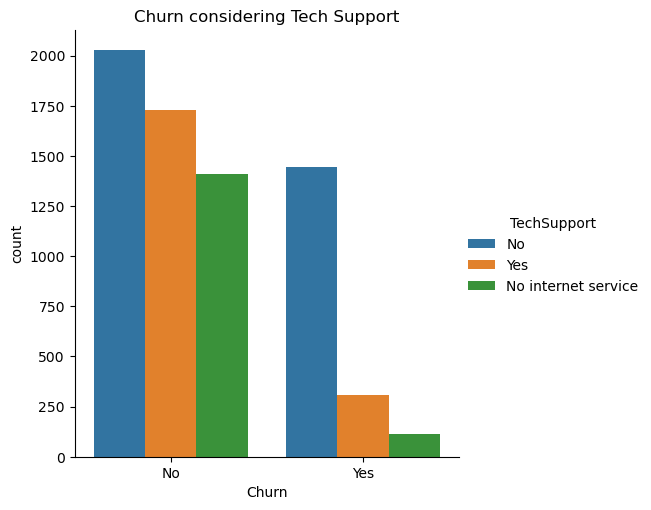

In [81]:
plt.figure()
sns.catplot(x="Churn",kind="count",data=df,hue="TechSupport")
plt.title("Churn considering Tech Support")
plt.show()

* Customers with no tech support are most likely to churn

In [82]:
df["OnlineSecurity"].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

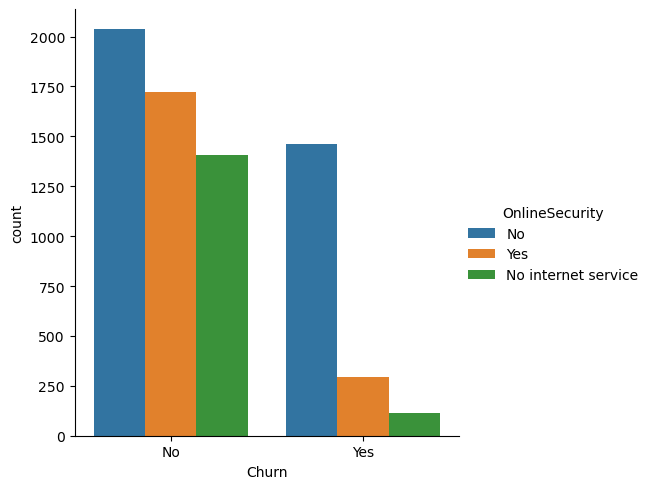

In [83]:
plt.figure()
sns.catplot(x="Churn",data=df,kind="count",hue="OnlineSecurity")
#plt.title("Churn considering Online Security")
plt.show()

* Customers with no online security are most likely to churn

<Figure size 640x480 with 0 Axes>

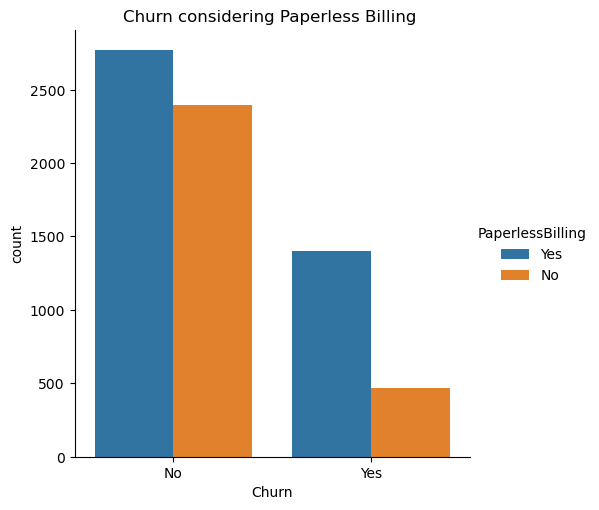

In [84]:
plt.figure()
sns.catplot(x="Churn",kind="count",hue="PaperlessBilling",data=df)
plt.title("Churn considering Paperless Billing ")
plt.show()


* Customers using paperless billing have a higher chance of churning.

<Figure size 640x480 with 0 Axes>

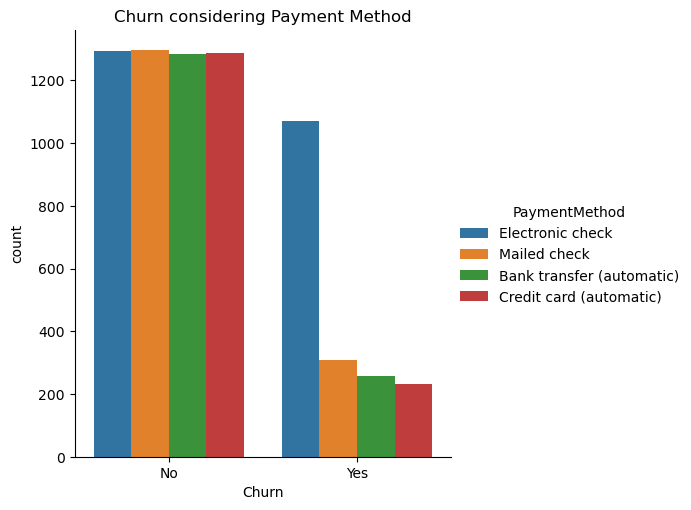

In [85]:
plt.figure()
sns.catplot(x="Churn",kind="count",hue="PaymentMethod",data=df)
plt.title("Churn considering Payment Method")
plt.show()


* customers that pay with electronic check have a higher chance of churn

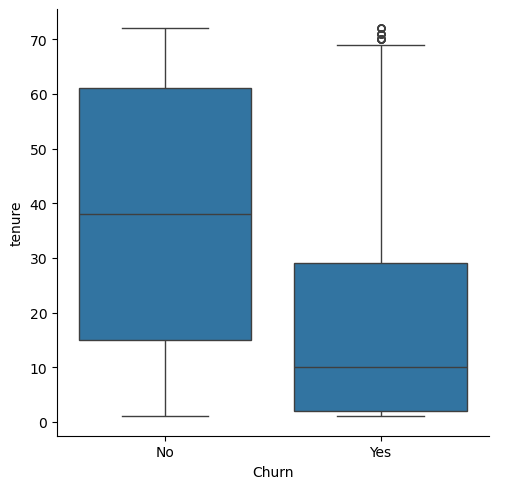

In [86]:
sns.catplot(x="Churn",y="tenure",data=df,kind="box")


* The mean value of months for people that left is approximately 10, which means they leave early. 

In [87]:
df.shape

(7032, 20)

## Data Preprocessing

In [88]:
#determining which features needs one hot encoding
categorical_col=df.select_dtypes(include=["object"]).columns
multi_class=[]
len(df["gender"].unique())
for col in categorical_col:
    if len(df[col].unique()) >2:
        multi_class.append(col)
for col in multi_class:
    print(f"\n{col}: {df[col].nunique()} unique values, {df[col].unique()}")



MultipleLines: 3 unique values, ['No phone service' 'No' 'Yes']

InternetService: 3 unique values, ['DSL' 'Fiber optic' 'No']

OnlineSecurity: 3 unique values, ['No' 'Yes' 'No internet service']

OnlineBackup: 3 unique values, ['Yes' 'No' 'No internet service']

DeviceProtection: 3 unique values, ['No' 'Yes' 'No internet service']

TechSupport: 3 unique values, ['No' 'Yes' 'No internet service']

StreamingTV: 3 unique values, ['No' 'Yes' 'No internet service']

StreamingMovies: 3 unique values, ['No' 'Yes' 'No internet service']

Contract: 3 unique values, ['Month-to-month' 'One year' 'Two year']

PaymentMethod: 4 unique values, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


* applying one hot encoding only at PaymentMethod , Contract, InternetService beacuse there values are different than (yes, no ,no ... service) and to avoid complixity

In [89]:
categorical_col=categorical_col.drop(['PaymentMethod', 'Contract', 'InternetService'])

ohe_col=['PaymentMethod', 'Contract', 'InternetService']


In [90]:
#label encoding
label_mappings={}
for col in categorical_col:
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))  # Store mapping
    print(f"{col} mapping: {label_mappings[col]}") 



gender mapping: {'Female': 0, 'Male': 1}
Partner mapping: {'No': 0, 'Yes': 1}
Dependents mapping: {'No': 0, 'Yes': 1}
PhoneService mapping: {'No': 0, 'Yes': 1}
MultipleLines mapping: {'No': 0, 'No phone service': 1, 'Yes': 2}
OnlineSecurity mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}
OnlineBackup mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}
DeviceProtection mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}
TechSupport mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingTV mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingMovies mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}
PaperlessBilling mapping: {'No': 0, 'Yes': 1}
Churn mapping: {'No': 0, 'Yes': 1}


In [91]:
#one hot encoding
ohe_encoder=OneHotEncoder(sparse_output=False)

ohe_array=ohe_encoder.fit_transform(df[ohe_col])
ohe_df=pd.DataFrame(ohe_array,columns=ohe_encoder.get_feature_names_out(ohe_col))
ohe_df.index=df.index

print(df.shape)
df=pd.concat([df,ohe_df],axis=1).drop(columns=ohe_col)
print(df.shape)

df.head(10)

(7032, 20)
(7032, 27)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,1,0,2,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,34,1,0,2,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,0,0,2,1,0,2,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,45,0,1,2,0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0,0,0,0,8,1,2,0,0,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1,0,0,1,22,1,2,0,2,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0,0,0,0,10,0,1,2,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0,0,1,0,28,1,2,0,0,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,1,0,0,1,62,1,0,2,2,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [92]:
corr_matrix=df.corr(numeric_only=True)
print("correlation of Churn\n\n",(corr_matrix["Churn"]).sort_values(ascending=True))

correlation of Churn

 tenure                                    -0.354049
Contract_Two year                         -0.301552
OnlineSecurity                            -0.289050
TechSupport                               -0.282232
InternetService_No                        -0.227578
TotalCharges                              -0.199484
OnlineBackup                              -0.195290
Contract_One year                         -0.178225
DeviceProtection                          -0.177883
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
StreamingMovies                           -0.038802
StreamingTV                               -0.036303
gender                                    -0.008545
PhoneService                             

In [93]:
df.drop(columns=["gender","PhoneService"], inplace=True) 
df.shape

(7032, 25)

* dropping low correlation features

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int32  
 2   Dependents                               7032 non-null   int32  
 3   tenure                                   7032 non-null   int64  
 4   MultipleLines                            7032 non-null   int32  
 5   OnlineSecurity                           7032 non-null   int32  
 6   OnlineBackup                             7032 non-null   int32  
 7   DeviceProtection                         7032 non-null   int32  
 8   TechSupport                              7032 non-null   int32  
 9   StreamingTV                              7032 non-null   int32  
 10  StreamingMovies                          7032 non-nul

In [95]:
scaler=StandardScaler()
scaled_array=scaler.fit_transform(df[["tenure", 'MonthlyCharges', 'TotalCharges']])
scaled_df=pd.DataFrame(scaled_array,columns=["tenure", 'MonthlyCharges', 'TotalCharges'])
scaled_df.index=df.index
print("shape before:",df.shape)
df = df.drop(columns=["tenure", "MonthlyCharges", "TotalCharges"])
df = pd.concat([df, scaled_df], axis=1)
print("shape after:",df.shape)

shape before: (7032, 25)
shape after: (7032, 25)


## Machine learning

In [96]:
x=df.drop(columns=["Churn"])
y=df["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [97]:
#logistic

log_model=LogisticRegression(random_state=42)
log_model.fit(x_train,y_train)
#print(f"Logistic regression accuracy: {log_model.score(x_test,y_test)}")
y_pred_log=log_model.predict(x_test)
log_accuracy=accuracy_score(y_test,y_pred_log)
print(f"Logistic regression accuracy: {log_accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Logistic regression accuracy: 0.7896233120113717

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [98]:
#decision tree
dtree_model=DecisionTreeClassifier()
dtree_model.fit(x_train,y_train)
y_pred_dtree=dtree_model.predict(x_test)
dtree_accuracy=accuracy_score(y_test,y_pred_dtree)
print(f"Decission tree  accuracy: {dtree_accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree))

Decission tree  accuracy: 0.7299218194740583

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



In [99]:
#random forest
rforest_model=RandomForestClassifier(random_state=42)
rforest_model.fit(x_train,y_train)
y_pred_rforest=rforest_model.predict(x_test)

rforest_accuracy=accuracy_score(y_test,y_pred_rforest)
print(f"Decission tree  accuracy: {rforest_accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rforest))

Decission tree  accuracy: 0.7860696517412935

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [100]:
#SVM
svm_model=SVC()
svm_model.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", svm_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.7917555081734187

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### Hyperparameter Tuning for best 2 models

In [101]:
#Random Forest


#Randomized saerch
rforest_model=RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [500,600],
    'max_depth': [10,20],
    'min_samples_split': [ 10,15]
    }
random_search = RandomizedSearchCV(estimator=rforest_model, param_distributions=param_dist, n_iter=8, cv=2,
                                    verbose=1, random_state=42)
random_search.fit(x_train, y_train)
print("Best parameters (Randomized Search):", random_search.best_params_)
print("Best score (Randomized Search) on cross validation:", random_search.best_score_)

#prediction with the best hyperparameters
rforest_model=RandomForestClassifier(n_estimators=600,max_depth=20,min_samples_split=10,random_state=42)
rforest_model.fit(x_train,y_train)
y_pred_rforest=rforest_model.predict(x_test)

rforest_accuracy=accuracy_score(y_test,y_pred_rforest)
print(f"Decission tree  accuracy: {rforest_accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rforest))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters (Randomized Search): {'n_estimators': 600, 'min_samples_split': 10, 'max_depth': 20}
Best score (Randomized Search) on cross validation: 0.8005347808564078
Decission tree  accuracy: 0.7981520966595593

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



C:\Users\asus\AppData\Local\Temp\ipykernel_7140\167795051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[log_accuracy, dtree_accuracy, rforest_accuracy, svm_accuracy], y=models,palette="pastel")


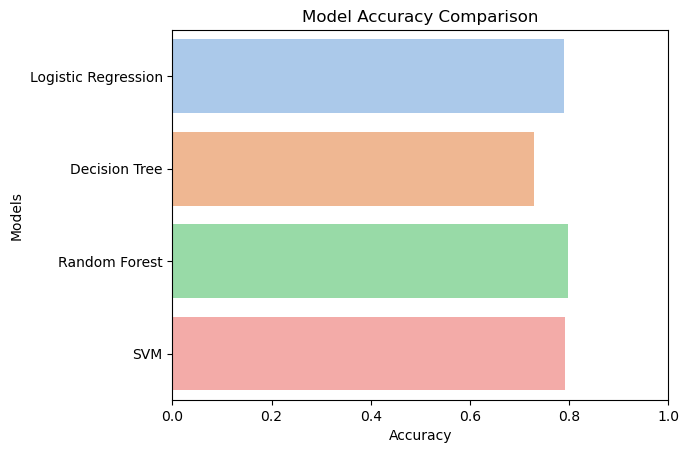

In [102]:
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]

sns.barplot(x=[log_accuracy, dtree_accuracy, rforest_accuracy, svm_accuracy], y=models,palette="pastel")

plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)  #x limit

plt.show()

## Deep learning models

In [103]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical


2.18.0


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7286 - loss: 0.5986 - val_accuracy: 0.7342 - val_loss: 0.4922
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 0.5171 - val_accuracy: 0.7342 - val_loss: 0.4696
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - loss: 0.4925 - val_accuracy: 0.7342 - val_loss: 0.4661
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7392 - loss: 0.4686 - val_accuracy: 0.7875 - val_loss: 0.4623
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7509 - loss: 0.4575 - val_accuracy: 0.7875 - val_loss: 0.4635
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7587 - loss: 0.4608 - val_accuracy: 0.7910 - val_loss: 0.4587
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7723 - loss: 0.4565 - val_accuracy: 0.7939 - val_loss: 0.4581
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7732 - loss: 0.4556 - val_accuracy: 0.

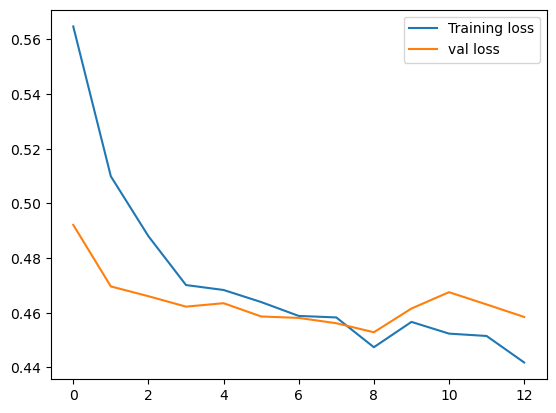

In [ ]:
# Adam 0.001lr
from tensorflow.keras.callbacks import EarlyStopping

Dmodel1 = Sequential([
    Dense(30, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),  # Drops 50% of neurons randomly
    Dense(20, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer 
])
early_stopping=EarlyStopping(monitor="val_loss",patience=4,restore_best_weights=True)#early stopping for validation loss
Dmodel1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = Dmodel1.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test),callbacks=[early_stopping])

Dtest_loss1, Dtest_accuracy1 = Dmodel1.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {Dtest_accuracy1 * 100:.2f}%")
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.legend()
plt.show()


Epoch 1/30


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6191 - loss: 0.6589 - val_accuracy: 0.7342 - val_loss: 0.5638
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - loss: 0.5808 - val_accuracy: 0.7342 - val_loss: 0.5164
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.5432 - val_accuracy: 0.7342 - val_loss: 0.4956
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.5184 - val_accuracy: 0.7626 - val_loss: 0.4707
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7514 - loss: 0.5023 - val_accuracy: 0.7875 - val_loss: 0.4557
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7621 - loss: 0.4739 - val_accuracy: 0.7861 - val_loss: 0.4537
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7487 - loss: 0.4848 - val_accuracy: 0.7889 - val_loss: 0.4523
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.4799 - val_accuracy: 0.7882 - val_loss: 0.4495
Epo

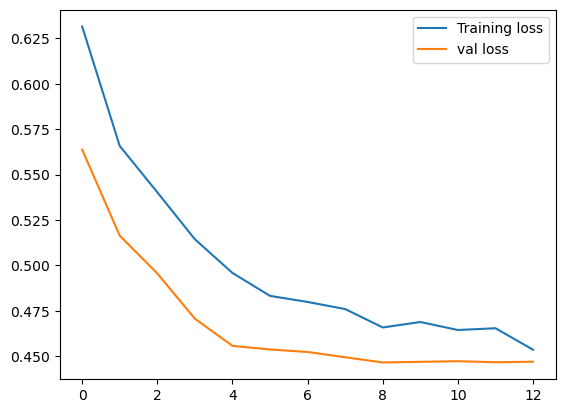

In [105]:
# Model2: optimizer Adam lr:0.0005

Dmodel2 = Sequential([
    Dense(30, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),  # Drops 50% of neurons randomly
    Dense(20, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
early_stopping=EarlyStopping(monitor="val_loss",patience=4,restore_best_weights=True)#early stopping for validation loss
Dmodel2.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history= Dmodel2.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test),callbacks=[early_stopping])

Dtest_loss2, Dtest_accuracy2 = Dmodel2.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {Dtest_accuracy2 * 100:.2f}%")
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.legend()
plt.show()

Epoch 1/20


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7265 - loss: 0.5806 - val_accuracy: 0.7335 - val_loss: 0.5017
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7351 - loss: 0.5133 - val_accuracy: 0.7846 - val_loss: 0.4659
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7462 - loss: 0.4928 - val_accuracy: 0.7868 - val_loss: 0.4588
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7693 - loss: 0.4656 - val_accuracy: 0.7832 - val_loss: 0.4533
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7748 - loss: 0.4803 - val_accuracy: 0.7868 - val_loss: 0.4509
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7716 - loss: 0.4604 - val_accuracy: 0.7839 - val_loss: 0.4500
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7810 - loss: 0.4678 - val_accuracy: 0.7861 - val_loss: 0.4454
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 0.4758 - val_accuracy: 0.7910 - val_

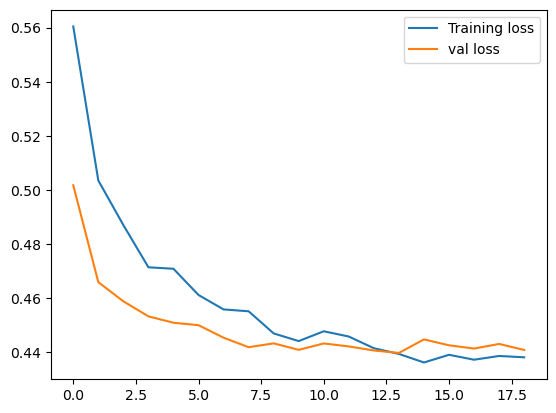

In [106]:
# Model3: optimizer RMSprop lr:0.0005
from tensorflow.keras.callbacks import EarlyStopping

Dmodel3 = Sequential([
    Dense(30, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),  # Drops 50% of neurons randomly
    Dense(20, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
#training
early_stopping=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)#early stopping for validation loss
Dmodel3.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history= Dmodel3.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test),callbacks=[early_stopping])
#evaluation
Dtest_loss3, Dtest_accuracy3 = Dmodel3.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {Dtest_accuracy3 * 100:.2f}%")



plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.legend()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_7140\571645156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names,y=accuracies,palette="muted",width=0.5)


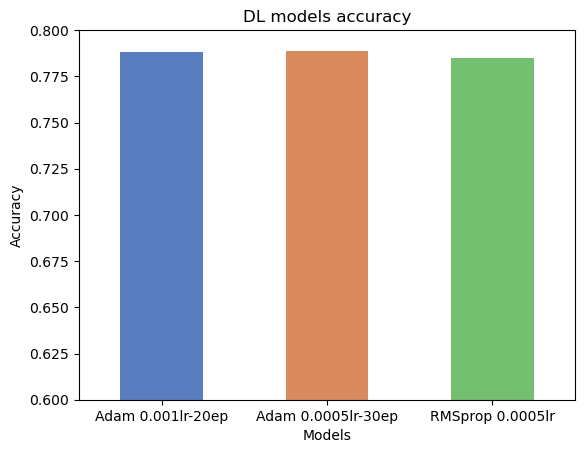

In [108]:
model_names=["Adam 0.001lr-20ep","Adam 0.0005lr-30ep","RMSprop 0.0005lr"]
accuracies=[Dtest_accuracy1,Dtest_accuracy2,Dtest_accuracy3]
sns.barplot(x=model_names,y=accuracies,palette="muted",width=0.5)
plt.ylim(0.6, 0.8)  
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("DL models accuracy")
plt.show()